<a href="https://colab.research.google.com/github/alirezash97/Computer-Vision/blob/main/Images/Noise.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

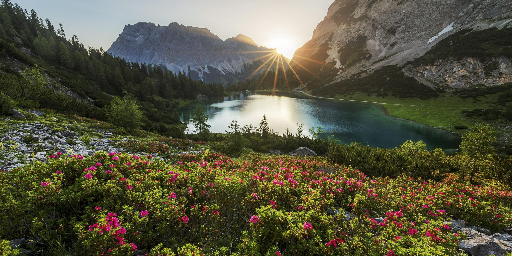

In [16]:
import cv2
from google.colab.patches import cv2_imshow
import numpy as np

img = cv2.imread('/content/Zugpsitze_mountain.jpg')
img = cv2.resize(image, (512, 256))
cv2_imshow(img)

Original Image:


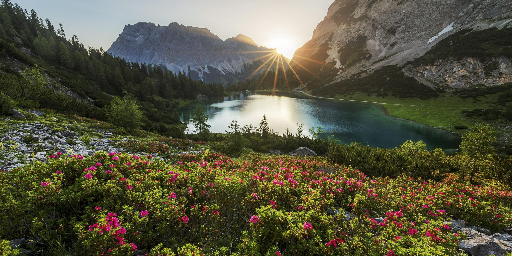

Gaussian Noisy Image:


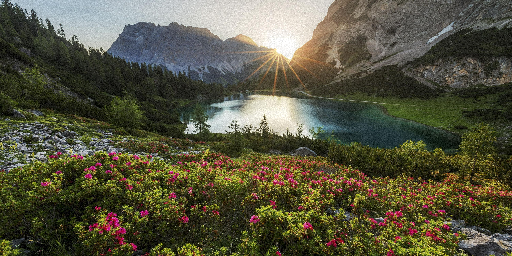

In [58]:
import numpy as np
import cv2
import glob


def gaussian_noise(img): 
  mean = 0
  var = 100
  sigma = var ** 0.5
  gaussian = np.random.normal(mean, sigma, (img.shape[0], img.shape[1])) 


  noisy_image = np.zeros(img.shape, np.float32)

  if len(img.shape) == 2:
      noisy_image = img + gaussian
  else:
      noisy_image[:, :, 0] = img[:, :, 0] + gaussian
      noisy_image[:, :, 1] = img[:, :, 1] + gaussian
      noisy_image[:, :, 2] = img[:, :, 2] + gaussian
  return noisy_image

gaussian_noisy_image = gaussian_noise(img)
print("Original Image:")
cv2_imshow(img)
print("Gaussian Noisy Image:")
cv2_imshow(gaussian_noisy_image)

Original Image


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  if __name__ == '__main__':
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:15: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  from ipykernel import kernelapp as app


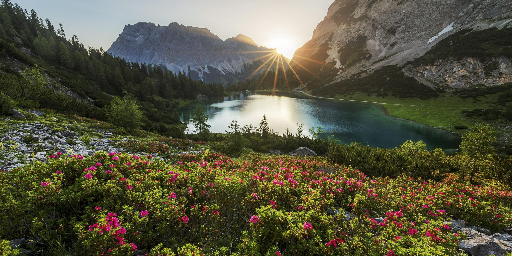

Salt and Pepper Noisy Image:


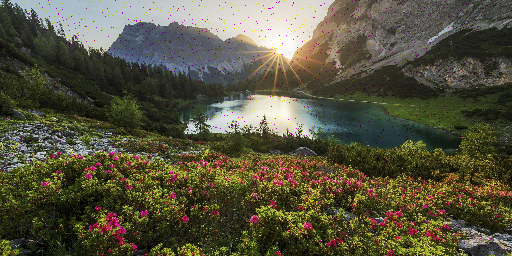

In [57]:
def sandp_noise(image, amount):

  s_vs_p = 0.5
  out = np.copy(image)
  # Salt mode
  num_salt = np.ceil(amount * image.size * s_vs_p)
  coords = [np.random.randint(0, i - 1, int(num_salt))
          for i in image.shape]
  out[coords] = 1

  # Pepper mode
  num_pepper = np.ceil(amount* image.size * (1. - s_vs_p))
  coords = [np.random.randint(0, i - 1, int(num_pepper))
          for i in image.shape]
  out[coords] = 0
  noisy = out
  return noisy

noisy_image = sandp_noise(img, 0.01)
print('Original Image')
cv2_imshow(img)
print("Salt and Pepper Noisy Image:")
cv2_imshow(noisy_image)


Average Filter Output:


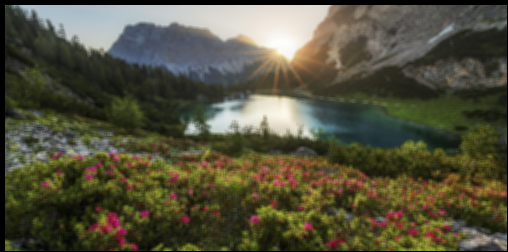

In [56]:
from math import floor
def averaging_filter(image, mask_size):

  filtered_image = np.zeros(( (image.shape[0]-mask_size+1), (image.shape[1]-mask_size+1), image.shape[2]))
  for i in range(mask_size, (image.shape[0]-mask_size)):
    for j in range(mask_size, (image.shape[1]-mask_size)):
      for k in range(image.shape[2]):
        interval = floor(mask_size/2)
        mask = image[ (i-interval):(i+interval), (j-interval):(j+interval), k]
        filtered_image[i, j, k] = np.mean(mask)
  return filtered_image

filtered_image = averaging_filter(image, 5)
print("Average Filter Output:")
cv2_imshow(filtered_image)

Median Filter Output:


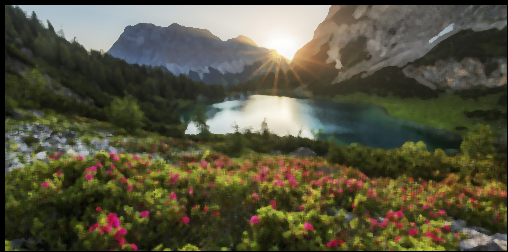

In [55]:
from math import floor
def median_filter(image, mask_size):

  filtered_image = np.zeros(( (image.shape[0]-mask_size+1), (image.shape[1]-mask_size+1), image.shape[2]))
  for i in range(mask_size, (image.shape[0]-mask_size)):
    for j in range(mask_size, (image.shape[1]-mask_size)):
      for k in range(image.shape[2]):
        interval = floor(mask_size/2)
        mask = image[ (i-interval):(i+interval), (j-interval):(j+interval), k]
        sorted_mask = np.sort(np.ndarray.flatten(mask))
        median_number = floor(len(sorted_mask) / 2) + 1
        filtered_image[i, j, k] = sorted_mask[median_number]
  return filtered_image

filtered_image = median_filter(image, 5)
print("Median Filter Output:")
cv2_imshow(filtered_image)